<a href="https://colab.research.google.com/github/HamzaKamranKhawaja/ai-internship/blob/main/UNIQUIFY_ASSIGNMENT_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

#obtain training and testing mnist data
mnist_dataset = tf.keras.datasets.mnist
(old_xtrain, old_ytrain), (old_xtest, old_ytest) = mnist_dataset.load_data()
old_xtrain, old_xtest = old_xtrain / 255.0, old_xtest / 255.0




In [ ]:

#creating fully connected nn with 10 output nodes
model_single = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(48, activation='relu'),
  tf.keras.layers.Dense(10)
])


#creating fully connected nn with 10 output nodes
model_double = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(48, activation='relu'),
  tf.keras.layers.Dense(10)
])


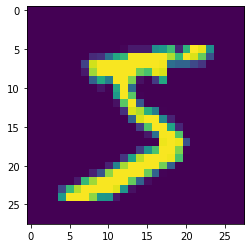

In [ ]:
#checking data
pd.DataFrame(x_train[0])
plt.imshow(x_train[0], interpolation='nearest')
plt.show()

In [ ]:
#To train model with doubly joined images
def createMNISTdoubled(old_mnist):
  '''Given MNIST dataset of single digits, concatenate two digits to produce a new dataset 
  of double digits.
  PARAM: old_mnist: tf.keras.datasets.mnist object
  RETURNS: (x_train, y_train ), (x_test, y_test): tuples containing the transformed/ joined images or labels.
  '''
  (old_xtr, old_ytr), (old_xte, old_yte) = old_mnist.load_data()
  old_x = old_xtr, old_xte 
  old_y = old_ytr, old_yte
  #indices for training and testing separated, sampled uniformly at random e.g [(1, 44), (595, 666)...]
  idx_tr, idx_te = [np.random.randint(x.shape[0], size=(x.shape[0], 2)) for x in old_x]
  print(idx_tr[:10])
  #new training and testing data obtained by concatenating array present at the indices found before. Each tuple is used to produce 1 new array or label
  new_xtr = np.array([np.hstack((old_xtr[x1], old_xtr[x2]))[:, ::2] for (x1, x2) in idx_tr])
  new_ytr = np.array([old_ytr[y1] * 10 + old_ytr[y2] for (y1, y2) in idx_tr])
  
  new_xte, new_yte = np.array([np.hstack((old_xte[x1], old_xte[x2]))[:, ::2] for x1, x2 in idx_te]), np.array([old_yte[y1] * 10 + old_yte[y2] for y1, y2 in idx_te])
  
  return (new_xtr, new_ytr, new_xte, new_yte) 


In [ ]:
def joinedimage(imdata, lbldata):
  '''Takes data containing MNIST images and labels, randomly selects two images and concatenates them and their label, 
  and returns the image array and label.
  PARAM: imdata: image arrays of MNIST digits
      : lbldata: label arrays of the MNIST digits. 
  RETURNS: rarray: return array of joined images.
          rlabel: label of the corresponding rarray.
  '''
  size = len(imdata)
  index = np.random.randint(size, size=(2))
  rarray, rlabel = np.array(np.hstack((imdata[index[0]], imdata[index[1]]))[:, ::2]), lbldata[index[0]] * 10 + lbldata[index[1]] 
  return rarray, rlabel

def shift(array, max_shift=10): 
  '''Takes the image array and randomly shifts it up/down/left/right by up to max_shift pixels. 
  PARAM: array: the image array to shift.
        max_shift: the maximum shift to be applied. Shift is uniformly sampled from range [-max_shift, max_shift]. 
  RETURNS: image array with the shift applied.
  '''
  axis = np.random.choice([0, 1])
  shift = np.random.randint(-max_shift, max_shift)
  array = np.roll(array, shift, axis=axis)
  return array


In [ ]:
x_train, y_train, x_test, y_test = createMNISTdoubled(mnist_dataset)
#x_<identifier> and y_<identifier> has new doubled data to train double model


[[ 4947 30072]
 [13399 15509]
 [42455  2576]
 [53751  7590]
 [42380   279]
 [54542 46279]
 [  101  7918]
 [26267 44804]
 [46704 23055]
 [24749 34001]]


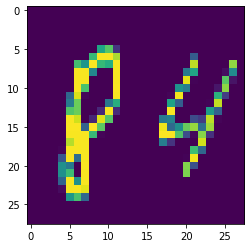

In [ ]:
plt.imshow(x_train[0])
plt.show() 

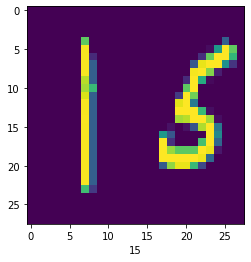

In [ ]:
newimg, newlbl = joinedimage(old_xtrain, old_ytrain)
plt.imshow(newimg)
plt.xlabel(newlbl)
plt.show()

In [ ]:
#train old model with old data
#loss function defined as categorical cross entropy i.e - summation(y_i_truth * log y_i_prediction) for all i
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model_single.compile(
    optimizer='adam',
    loss=loss_function, 
    metrics=['accuracy'])
model_single.fit(old_xtrain, old_ytrain, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3529 - accuracy: 0.8924
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1882 - accuracy: 0.9432
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1528 - accuracy: 0.9524
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1352 - accuracy: 0.9585
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1205 - accuracy: 0.9625
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1119 - accuracy: 0.9646
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1052 - accuracy: 0.9672
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0975 - accuracy: 0.9692
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0963 - accuracy: 0.9694
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.090

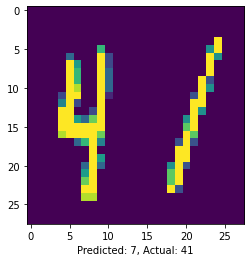

In [ ]:
#predictions of doubly joined image using single model
newimg, newlabel = joinedimage(old_xtrain, old_ytrain)
prediction = model_single.predict(np.expand_dims(newimg, 0))
plt.imshow(newimg)
plt.xlabel(f"Predicted: {np.argmax(prediction)}, Actual: {newlabel}")
plt.show()

In [ ]:
#prediction with shifted vs original images
old = np.array(old_xtest[:20])
actual = old_ytest[:20]
new = np.array([shift(x) for x in old]) 

old_pred = tf.argmax(model_single.predict(old), 1)
new_pred = tf.argmax(model_single.predict(new), 1)

In [ ]:
print(actual)
print(old_pred)
print(new_pred)


[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
tf.Tensor([7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 8 4], shape=(20,), dtype=int64)
tf.Tensor([6 2 1 2 3 5 0 2 6 7 1 6 3 6 3 5 9 7 9 7], shape=(20,), dtype=int64)


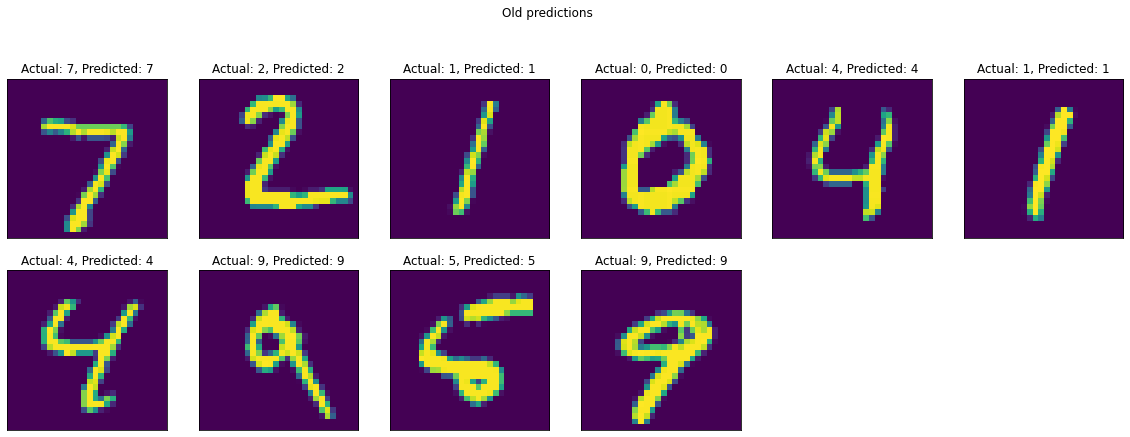

In [ ]:
#plot old predictions

noofitems = 10
fig = plt.figure(figsize=(20, 10))
fig.suptitle("Old predictions")
i = 1
for j in range(noofitems): 
  ax = fig.add_subplot(3, 6, i)
  ax.imshow(old[j])
  ax.title.set_text(f"Actual: {actual[j]}, Predicted: {old_pred[j]}")
  plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
  i += 1

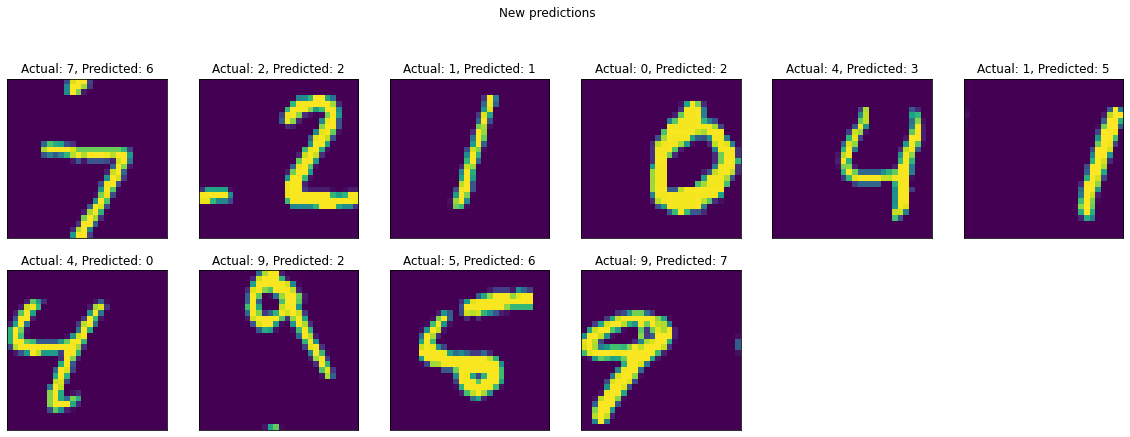

In [ ]:

#plot new predictions

noofitems = 10
fig = plt.figure(figsize=(20, 10))
fig.suptitle("New predictions")
i = 1
for j in range(noofitems): 
  ax = fig.add_subplot(3, 6, i)
  ax.imshow(new[j])
  ax.title.set_text(f"Actual: {actual[j]}, Predicted: {new_pred[j]}")
  plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
  i += 1

In [ ]:
model_single.evaluate(old_xtest, old_ytest, verbose=2)

313/313 - 1s - loss: 0.0767 - accuracy: 0.9792 - 503ms/epoch - 2ms/step


[0.07667320221662521, 0.979200005531311]

In [ ]:
#shift all arrays in old_xtest to make shifted_oldxtest
shifted_oldxtest = np.array(list(map(shift, old_xtest)))

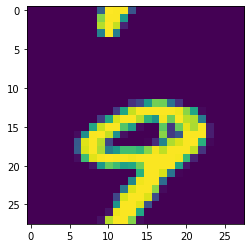

In [ ]:
plt.imshow(shifted_oldxtest[9])
plt.show()

In [ ]:
model_single.evaluate(shifted_oldxtest, old_ytest, verbose=2)

313/313 - 1s - loss: 9.4398 - accuracy: 0.3748 - 581ms/epoch - 2ms/step


[9.439831733703613, 0.3747999966144562]

Shifting images or augmenting images drastically reduces the accuracy of the model. Some reasons include: Training was done on unshifted images or non augmented images, higher variance is observed with shifted 
images and model is not tolerant to variance because of lack of variance in training data etc. 

In [ ]:
model_single.save('models/single_mnist')

INFO:tensorflow:Assets written to: models/single_mnist/assets


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model_single.save('/content/drive/MyDrive/Colab Notebooks/models/single_mnist')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/models/single_mnist/assets
